# H-He Mixture Simulation

In [1]:
# Import the usual libraries
%pylab
%matplotlib inline
import os
plt.style.use('MSUstyle')
# Import sarkas
from sarkas.processes import Simulation, PostProcess, PreProcess
from sarkas.tools.transport import TransportCoefficient

# Create the file path to the YAML input file
example_directory = os.path.join('..',
                                 os.path.join('sarkas',
                                              os.path.join('examples', 'Coulomb')))

input_file_name = os.path.join(example_directory, 'BIM_cgs.yaml')

Using matplotlib backend: TkAgg
Populating the interactive namespace from numpy and matplotlib


In [2]:
sim = Simulation(input_file_name)
sim.setup(read_yaml=True)
sim.run()







  _________             __                   
 /   _____/____ _______|  | _______    ______
 \_____  \\__  \\_  __ \  |/ /\__  \  /  ___/
 /        \/ __ \|  | \/    <  / __ \_\___ \ 
/_______  (____  /__|  |__|_ \(____  /____  >
        \/     \/           \/     \/     \/ 


An open-source pure-python molecular dynamics suite for non-ideal plasmas.



* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * *
                                   Simulation                                   
* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * *

Job ID:  bim_gamma_40
Job directory:  Simulations/bim_gamma_40

Equilibration dumps directory: 
 Simulations/bim_gamma_40/Simulation/Equilibration/dumps
Production dumps directory: 
 Simulations/bim_gamma_40/Simulation/Production/dumps

Equilibration Thermodynamics file: 
 Simulations/bim_gamma_40/Simulation/Equilibration/EquilibrationEnergy_bim_gamma_40

  0%|          | 0/5000 [00:00<?, ?it/s]


Equilibration Time: 0 hrs 2 min 24 sec

------------- Production -------------


  0%|          | 0/36000 [00:00<?, ?it/s]


Production Time: 0 hrs 18 min 21 sec

Total Time: 0 hrs 20 min 46 sec


In [3]:
postproc = PostProcess(input_file_name)
postproc.setup(read_yaml=True)




* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * *
                                 Postprocessing                                 
* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * *

Job ID:  bim_gamma_40
Job directory:  Simulations/bim_gamma_40
PostProcessing directory: 
 Simulations/bim_gamma_40/PostProcessing

Equilibration dumps directory:  Simulations/bim_gamma_40/Simulation/Equilibration/dumps
Production dumps directory: 
 Simulations/bim_gamma_40/Simulation/Production/dumps

Equilibration Thermodynamics file: 
 Simulations/bim_gamma_40/Simulation/Equilibration/EquilibrationEnergy_bim_gamma_40.csv
Production Thermodynamics file: 
 Simulations/bim_gamma_40/Simulation/Production/ProductionEnergy_bim_gamma_40.csv


In [4]:
# Equilibration check
# postproc.therm.setup(postproc.parameters)
# postproc.therm.temp_energy_plot(postproc, phase='equilibration')


In [5]:
# Production check
# postproc.therm.temp_energy_plot(postproc, phase='production')

In [6]:
# postproc.rdf.setup(postproc.parameters)
# postproc.rdf.compute()
# postproc.rdf.plot(scaling = postproc.parameters.a_ws, 
#                   xlabel = r'$r / a_{\rm ws}$')

In [7]:
from sarkas.tools.observables import StaticStructureFactor

ssf = StaticStructureFactor()
ssf.no_slices = 4
ssf.angle_averaging = 'full'
ssf.max_ka_value = 5
ssf.setup(postproc.parameters)
ssf.pretty_print()




===================== Static Structure Function ====================== 

k wavevector information saved in: 
 Simulations/bim_gamma_40/PostProcessing/k_space_data/k_arrays.npz
n(k,t) Data saved in: 
 Simulations/bim_gamma_40/PostProcessing/k_space_data/nkt.h5
Data saved in: 
 Simulations/bim_gamma_40/PostProcessing/StaticStructureFunction/Production/StaticStructureFunction_bim_gamma_40.h5
Data accessible at: self.k_list, self.k_counts, self.ka_values, self.dataframe

Smallest wavevector k_min = 2 pi / L = 3.9 / N^(1/3)
k_min = 0.3898 / a_ws = 1.5898e+09 [1/cm]

Angle averaging choice: full
	Maximum angle averaged k harmonics = n_x, n_y, n_z = 7, 7, 7
	Largest angle averaged k_max = k_min * sqrt( n_x^2 + n_y^2 + n_z^2)
	k_max = 4.7258 / a_ws = 1.9276e+10 [1/cm]

Total number of k values to calculate = 511
No. of unique ka values to calculate = 108


In [8]:
ssf.compute()
ssf.dataframe


Calculating n(k,t) for slice 1/4.


  0%|          | 0/3000 [00:00<?, ?it/s]


Calculating n(k,t) for slice 2/4.


  0%|          | 0/3000 [00:00<?, ?it/s]


Calculating n(k,t) for slice 3/4.


  0%|          | 0/3000 [00:00<?, ?it/s]


Calculating n(k,t) for slice 4/4.


  0%|          | 0/3000 [00:00<?, ?it/s]


n(k,t) Calculation Time: 0 hrs 4 min 28 sec

Calculating S(k) ...


  0%|          | 0/4 [00:00<?, ?it/s]


Static Structure Function Calculation Time: 0 sec 619 msec 107 usec 27 nsec


Inverse Wavelength       H-H                H-He               He-He  \
                   NaN      Mean       Std      Mean       Std      Mean   
0         1.589833e+09  1.094792  0.616749 -0.551028  0.310453  0.277975   
1         2.248364e+09  0.867479  0.370983 -0.439458  0.187969  0.223957   
2         2.753672e+09  0.674642  0.627824 -0.344093  0.321553  0.177615   
3         3.179666e+09  0.840883  0.320497 -0.431661  0.164964  0.224423   
4         3.554975e+09  0.757408  0.223564 -0.390527  0.115529  0.205032   
..                 ...       ...       ...       ...       ...       ...   
103       1.697477e+10  1.004320  0.975365  0.401207  0.956539  1.822256   
104       1.748816e+10  1.248737  0.722917  0.452297  0.565465  1.321414   
105       1.763210e+10  1.160343  0.708358  0.402014  0.503764  1.217773   
106       1.840365e+10  1.208567  0.730630  0.343024  0.492919  1.161769   
107       1.927570e+10  1.307185  1.226572  0.285702  0.843814  0.977365   

               
          Std  
0    0.156495  
1    0.095852  
2    0.165672  
3    0.086003  
4    0.060785  
..        ...  
103  1.717569  
104  0.741035  
105  0.684279  
106  0.614164  
107  0.957148  

[108 rows x 7 columns]

<AxesSubplot:xlabel='$ka$'>

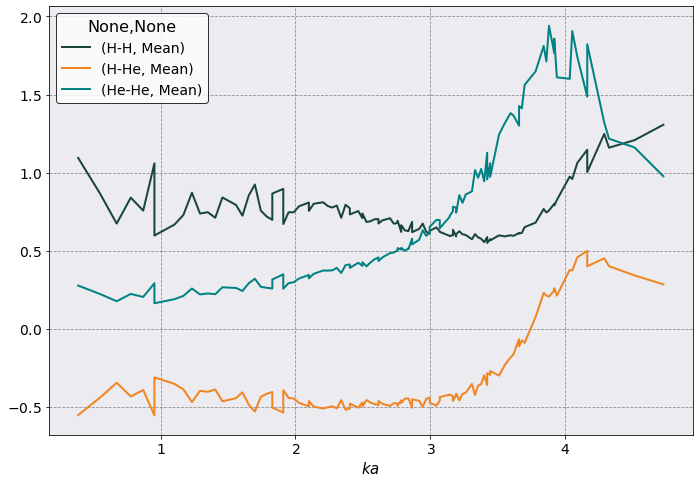

In [9]:
ssf.plot(
    scaling = 1 /ssf.a_ws,
    y= [('H-H', 'Mean'), ('H-He', 'Mean'), ('He-He', 'Mean')], 
    xlabel = r'$ka$')

In [10]:
from sarkas.tools.observables import DynamicStructureFactor

dsf = DynamicStructureFactor()
dsf.no_slices = 3
dsf.angle_averaging = 'custom'
dsf.max_aa_ka_value = 2
dsf.max_ka_value = 5
dsf.setup(postproc.parameters)
dsf.pretty_print()




====================== Dynamic Structure Factor ====================== 

k wavevector information saved in: 
 Simulations/bim_gamma_40/PostProcessing/k_space_data/k_arrays.npz
n(k,t) data saved in: 
 Simulations/bim_gamma_40/PostProcessing/k_space_data/nkt.h5
Data saved in: 
 Simulations/bim_gamma_40/PostProcessing/DynamicStructureFactor/Production/DynamicStructureFactor_bim_gamma_40.h5
Data accessible at: self.k_list, self.k_counts, self.ka_values, self.frequencies, self.dataframe

Frequency Space Parameters:
	No. of slices = 3
	No. dumps per slice = 4000
	Frequency step dw = 2 pi (no_slices * prod_dump_step)/(production_steps * dt)
	dw = 0.0101 w_p = 1.6890e+15 [Hz]
	Maximum Frequency w_max = 2 pi /(prod_dump_step * dt)
	w_max = 20.1592 w_p = 3.3781e+18 [Hz]


Wavevector parameters:
Smallest wavevector k_min = 2 pi / L = 3.9 / N^(1/3)
k_min = 0.3898 / a_ws = 1.5898e+09 [1/cm]

Angle averaging choice: custom
	Maximum angle averaged k harmonics = n_x, n_y, n_z = 2, 2, 2
	Largest angl

In [11]:
dsf.compute()


Calculating n(k,t) for slice 1/3.


  0%|          | 0/4000 [00:00<?, ?it/s]


Calculating n(k,t) for slice 2/3.


  0%|          | 0/4000 [00:00<?, ?it/s]


Calculating n(k,t) for slice 3/3.


  0%|          | 0/4000 [00:00<?, ?it/s]


n(k,t) Calculation Time: 0 hrs 0 min 34 sec

Dynamic Structure Factor Calculation Time: 1 sec 156 msec 438 usec 836 nsec


ValueError: Columns index has to be unique for fixed format

In [12]:
dsf.dataframe

H-H                                            \
                            Mean                                             
       Frequencies ka = 0.389778 ka = 0.551229 ka = 0.675115 ka = 0.779555   
0    -3.378057e+18  1.044151e-23  1.628263e-23  4.345452e-24  1.436664e-23   
1    -3.376368e+18  1.044151e-23  1.628264e-23  4.345455e-24  1.436665e-23   
2    -3.374679e+18  1.044152e-23  1.628267e-23  4.345463e-24  1.436667e-23   
3    -3.372990e+18  1.044154e-23  1.628273e-23  4.345477e-24  1.436671e-23   
4    -3.371301e+18  1.044158e-23  1.628280e-23  4.345496e-24  1.436677e-23   
...            ...           ...           ...           ...           ...   
3995  3.369611e+18  1.044171e-23  1.628286e-23  4.345518e-24  1.436687e-23   
3996  3.371301e+18  1.044165e-23  1.628277e-23  4.345494e-24  1.436679e-23   
3997  3.372990e+18  1.044159e-23  1.628271e-23  4.345476e-24  1.436672e-23   
3998  3.374679e+18  1.044155e-23  1.628266e-23  4.345462e-24  1.436668e-23   
3999  3.376368e+18  1.044152e-23  1.628263e-23  4.345455e-24  1.436665e-23   

                                                                            \
                                                                             
     ka = 0.871569 ka = 0.954757 ka = 0.954757 ka = 1.102458 ka = 1.169333   
0     8.560134e-24  1.490454e-23  5.972285e-24  8.908793e-24  4.860503e-24   
1     8.560109e-24  1.490454e-23  5.972328e-24  8.908822e-24  4.860451e-24   
2     8.560095e-24  1.490456e-23  5.972379e-24  8.908861e-24  4.860405e-24   
3     8.560092e-24  1.490460e-23  5.972437e-24  8.908912e-24  4.860365e-24   
4     8.560099e-24  1.490466e-23  5.972502e-24  8.908973e-24  4.860331e-24   
...            ...           ...           ...           ...           ...   
3995  8.560416e-24  1.490481e-23  5.972180e-24  8.908815e-24  4.860854e-24   
3996  8.560338e-24  1.490472e-23  5.972187e-24  8.908789e-24  4.860772e-24   
3997  8.560272e-24  1.490465e-23  5.972200e-24  8.908773e-24  4.860696e-24   
3998  8.560215e-24  1.490459e-23  5.972221e-24  8.908769e-24  4.860626e-24   
3999  8.560169e-24  1.490456e-23  5.972250e-24  8.908776e-24  4.860562e-24   

      ...         He-He                                            \
      ...           Std                                             
      ... ka = 1.169333 ka = 1.350230 ka = 1.559111 ka = 1.948889   
0     ...  1.119472e-24  2.096197e-24  5.621189e-24  4.916269e-24   
1     ...  1.119473e-24  2.096173e-24  5.621135e-24  4.916233e-24   
2     ...  1.119476e-24  2.096151e-24  5.621088e-24  4.916203e-24   
3     ...  1.119481e-24  2.096132e-24  5.621048e-24  4.916180e-24   
4     ...  1.119487e-24  2.096115e-24  5.621015e-24  4.916162e-24   
...   ...           ...           ...           ...           ...   
3995  ...  1.119484e-24  2.096358e-24  5.621562e-24  4.916538e-24   
3996  ...  1.119479e-24  2.096321e-24  5.621473e-24  4.916472e-24   
3997  ...  1.119475e-24  2.096286e-24  5.621392e-24  4.916412e-24   
3998  ...  1.119472e-24  2.096254e-24  5.621317e-24  4.916358e-24   
3999  ...  1.119471e-24  2.096224e-24  5.621249e-24  4.916310e-24   

                                                                            \
                                                                             
     ka = 2.338666 ka = 2.728444 ka = 3.118222 ka = 3.507999 ka = 3.897777   
0     3.683165e-24  5.712330e-24  1.192017e-23  2.168552e-23  1.417874e-23   
1     3.683179e-24  5.712311e-24  1.192029e-23  2.168535e-23  1.417868e-23   
2     3.683196e-24  5.712298e-24  1.192042e-23  2.168520e-23  1.417863e-23   
3     3.683219e-24  5.712292e-24  1.192056e-23  2.168508e-23  1.417860e-23   
4     3.683246e-24  5.712293e-24  1.192072e-23  2.168498e-23  1.417859e-23   
...            ...           ...           ...           ...           ...   
3995  3.683166e-24  5.712536e-24  1.191981e-23  2.168680e-23  1.417934e-23   
3996  3.683157e-24  5.712480e-24  1.191985e-23  2.168649e-23  1.417918e-23   
3997  3.683152e-24

In [ ]:
dsf.plot(
    scaling = dsf.total_plasma_frequency, 
    y= [('H-H', 'Mean','ka = 0.389778'), ('H-He', 'Mean','ka = 0.389778'), ('He-He', 'Mean','ka = 0.389778')], 
    logy = True, 
    xlim = (-3, 3), 
    xlabel = r'$\omega /\omega_p$')


In [ ]:
ax = dsf.plot(
    scaling = dsf.total_plasma_frequency,
    y=('H-H', 'Mean', 'ka = 0.779555'),
    logy = True,
    xlim=(-3, 3),
    xlabel = r'$\omega / \omega_p$')

ax.fill_between(
    dsf.dataframe.iloc[:,0] / dsf.total_plasma_frequency,
    abs(dsf.dataframe[('H-H','Mean','ka = 0.779555')] - dsf.dataframe[('H-H','Std','ka = 0.779555')]),
    abs(dsf.dataframe['H-H']['Mean']['ka = 0.779555'] + dsf.dataframe[('H-H','Std','ka = 0.779555')]),
               alpha = 0.2)